In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [3]:
train_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
test_df

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [6]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB


In [27]:
from tensorflow.keras.utils import to_categorical

In [28]:
X_train = train_df.drop('label',axis=1).values
X_test = test_df.values
y_train = to_categorical(train_df['label'].values,num_classes=10)

In [29]:
#normalizing
X_train = X_train/255.
X_test = X_test/255.

In [31]:
X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)

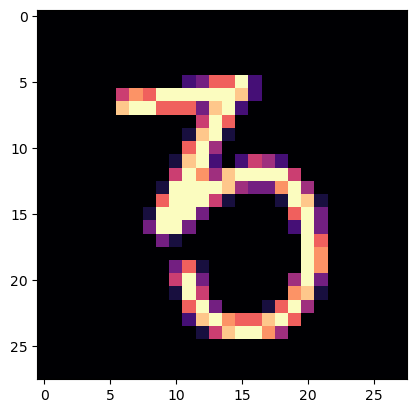

In [36]:
img = np.array(train_df.drop('label',axis=1).iloc[90]).reshape(28,28)
plt.imshow(img,cmap='magma')

In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,ZeroPadding2D,BatchNormalization,ReLU,MaxPooling2D,Flatten,Dense,Dropout

In [46]:
def create_cnn():
    model = Sequential()
    #zero padding layer, channel_last = (m,h,w,channels)
    model.add(ZeroPadding2D(padding=(1,1),data_format='channels_last'))
    #conv2d
    model.add(Conv2D(filters=10,kernel_size=(5,5),strides=(1,1)))
    #batch_norm , axis=3, because channel_last format
    model.add(BatchNormalization(axis=3))
    #RElu
    model.add(ReLU())
    #MAxpool = (2,2) stride =2 and window(f) =2x2
    model.add(MaxPooling2D((2,2)))
    #flatten
    model.add(Flatten())
    #fully connected Dense layer
    #layer 1 ->980
    model.add(Dense(980,activation='relu'))
    model.add(Dropout(0.3))
    #layer 2 ->245
    model.add(Dense(245,activation='relu'))
    model.add(Dropout(0.3))
    #layer 3 ->122
    model.add(Dense(122,activation='relu'))
    model.add(Dropout(0.3))
    #layer 4 -> 61
    model.add(Dense(61,activation='relu'))
    model.add(Dropout(0.3))
    #layer 4 ->30
    model.add(Dense(30,activation='relu'))
    model.add(Dropout(0.3))
    #output layer
    model.add(Dense(10,activation='softmax'))
    model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
    model.summary()
    return model 

In [49]:
model = create_cnn()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ zero_padding2d (ZeroPadding2D)  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu (ReLU)                    │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [48]:
from tensorflow.keras.backend import clear_session
clear_session()

In [157]:
import tensorflow as tf
tf.debugging.set_log_device_placement(True)
with tf.device('/GPU:0'):
    model.fit(X_train,y_train,epochs=10)

Epoch 1/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 23s 17ms/step - accuracy: 0.9892 - loss: 0.0487
Epoch 2/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 22s 17ms/step - accuracy: 0.9899 - loss: 0.0496
Epoch 3/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 22s 17ms/step - accuracy: 0.9915 - loss: 0.0416
Epoch 4/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 22s 17ms/step - accuracy: 0.9914 - loss: 0.0363
Epoch 5/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 22s 17ms/step - accuracy: 0.9910 - loss: 0.0432
Epoch 6/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 22s 17ms/step - accuracy: 0.9934 - loss: 0.0314
Epoch 7/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 22s 17ms/step - accuracy: 0.9928 - loss: 0.0339
Epoch 8/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 22s 17ms/step - accuracy: 0.9935 - loss: 0.0371
Epoch 9/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 22s 17ms/step - accuracy: 0.9947 - loss: 0.0267
Epoch 10/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 22s 17ms/step - accuracy: 0.9944 - loss: 0.0284


In [158]:
predictions = model.predict(X_test)

875/875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [159]:
predicted_classes = np.argmax(predictions, axis=1)

In [54]:
predicted_classes

array([2, 0, 9, ..., 3, 9, 2])

In [160]:
submission_df = pd.DataFrame({'ImageId': np.arange(1, len(predicted_classes) + 1), 'Label': predicted_classes})

In [161]:
submission_df.set_index('ImageId').to_csv('Digit_recon_5.csv')

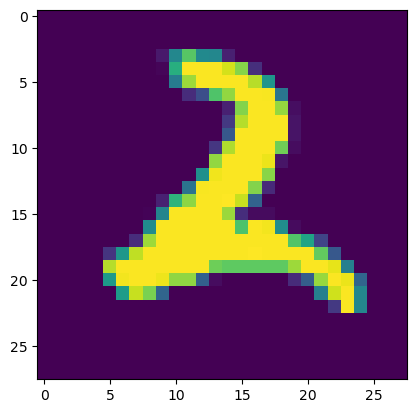

In [98]:
import random 
random_int = random.randint(1,28000)
img = test_df.iloc[random_int].values
img = img.reshape(28,28,1)
plt.imshow(img)

In [99]:
pred = model.predict(img.reshape(-1,28,28,1))
predicted_classe = np.argmax(pred, axis=1)
print(f'number predicted: {predicted_classe}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
number predicted: [2]


In [153]:
import numpy as np
from PIL import Image

def preprocess_image(image_path):
    # Load the image
    img = Image.open(image_path)
    
    # Convert to grayscale
    img = img.convert('L')
    
    # Resize to 28x28
    img = img.resize((28, 28))
    
    # Convert to NumPy array
    img_array = np.array(img)
    
    # Invert the image
    img_array = 255 - img_array
    
    # Normalize pixel values to range [0, 1]
    img_array = img_array / 255.0
    
    # Reshape to (28, 28, 1)
    img_array = img_array.reshape((28, 28, 1))
    
    return img_array
  # Replace with the path to your image
processed_image = preprocess_image('/Users/aadityajoshi/Downloads/digit_img_3.jpeg')

print(processed_image.shape)  # Output should be (28, 28, 1)


(28, 28, 1)


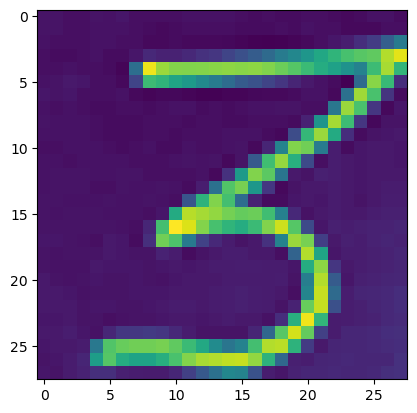

In [154]:
plt.imshow(processed_image)

In [155]:
prediction = model.predict(processed_image.reshape(-1,28,28,1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


In [156]:
np.argmax(prediction,axis=1)

array([3])